# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [18]:
import pandas as pd
cr_df = pd.read_excel('GermanCredit.xlsx')
cr_df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [19]:
cr_df.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

(array([445., 293.,  97.,  80.,  38.,  19.,  14.,   8.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <BarContainer object of 10 artists>)

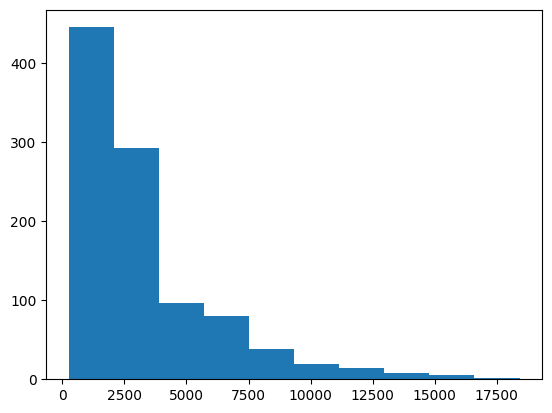

In [20]:
import matplotlib.pyplot as plt
plt.hist(cr_df['CreditAmount'])

# 3b. Create creditability dataframe

In [21]:
amountintervals = [(0, 500), (501, 1000), (1001, 1500), (1501, 2000), (2001, 2500), (2501, 5000), (5001, 7500), (7501, 10000), (10001, 15000), (15001, 20000)]
amountintervals

[(0, 500),
 (501, 1000),
 (1001, 1500),
 (1501, 2000),
 (2001, 2500),
 (2501, 5000),
 (5001, 7500),
 (7501, 10000),
 (10001, 15000),
 (15001, 20000)]

In [22]:
interval_df = pd.DataFrame(amountintervals, columns = ['intervalLeftSide', 'intervalRightSide'])
interval_df

,intervalLeftSide,intervalRightSide
0,0,500
1,501,1000
2,1001,1500
3,1501,2000
4,2001,2500
5,2501,5000
6,5001,7500
7,7501,10000
8,10001,15000
9,15001,20000


In [23]:
credibility0 = []
credibility1 = []
for i in amountintervals:
  sub = cr_df[cr_df['CreditAmount'] >= i[0]]
  sub = sub[sub['CreditAmount'] <= i[1]]
  credibility0.append(sub[sub['Creditability'] == 0].shape[0])
  credibility1.append(sub[sub['Creditability'] == 1].shape[0])

credibility0

[3, 34, 51, 33, 26, 75, 34, 20, 21, 3]

In [24]:
credibility1

[15, 64, 139, 93, 79, 200, 68, 26, 14, 2]

In [25]:
temp = pd.DataFrame(list(zip(credibility0,credibility1)), columns = ['Credibility0', 'Credibility1'])
temp

,Credibility0,Credibility1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79
5,75,200
6,34,68
7,20,26
8,21,14
9,3,2


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [26]:
creditability_df = pd.concat([interval_df, temp], axis = 1)
creditability_df["total"] = creditability_df['Credibility0'] + creditability_df['Credibility1']
creditability_df

,intervalLeftSide,intervalRightSide,Credibility0,Credibility1,total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105
5,2501,5000,75,200,275
6,5001,7500,34,68,102
7,7501,10000,20,26,46
8,10001,15000,21,14,35
9,15001,20000,3,2,5


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

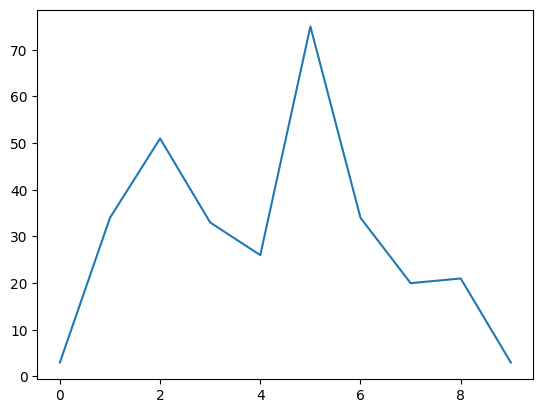

In [27]:
plt.plot(creditability_df['Credibility0'])

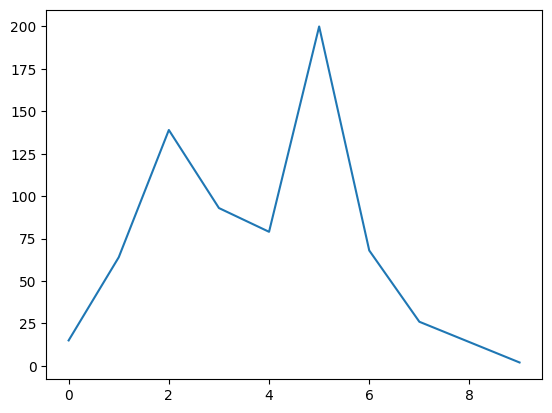

In [28]:
plt.plot(creditability_df['Credibility1'])

# 6. Prepare input data for the model

In [49]:
import numpy as np
X = np.array(cr_df['CreditAmount']).reshape(-1, 1)
y = (cr_df['Creditability']).astype('category')
X[0:5,:]

array([[1049],
       [2799],
       [ 841],
       [2122],
       [2171]])

In [50]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Creditability, dtype: category
Categories (2, int64): [0, 1]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# 7. Fit logistic regression model

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# 8. Test accuracy calculation

In [53]:
model.score(X_test, y_test)

0.7133333333333334

In [54]:
y_pred = model.predict(X_test)

# 9. Build a confusion matrix

In [55]:
from sklearn import metrics 
metrics.confusion_matrix(y_test, y_pred)

array([[  7,  84],
       [  2, 207]])

In [59]:
metrics.f1_score(y_test, y_pred)

0.8280000000000001

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

<ipython-input-67-1d7ee953fd82>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, color = 'g', kde = False)
<ipython-input-67-1d7ee953fd82>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, color = 'b', kde = False)


<Axes: xlabel='Creditability'>

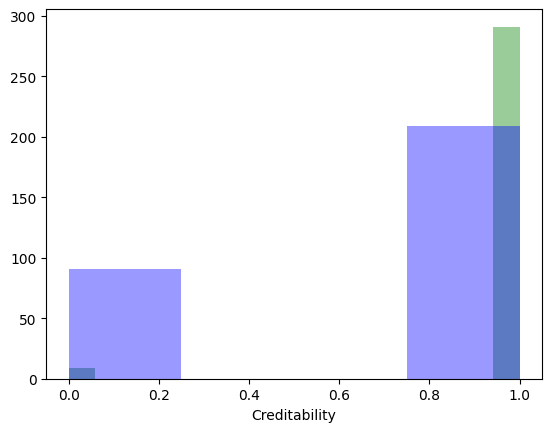

In [67]:
import seaborn as sns
sns.distplot(y_pred, color = 'g', kde = False)
sns.distplot(y_test, color = 'b', kde = False)